In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diamonds.csv",index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
# clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
# color : J (worst) to D (best)
cols = ["cut","color","clarity"]
for i in cols:
    print(df[i].value_counts())
    print("=============================")

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [6]:
df = df.drop(df[df["x"] == 0].index)
df = df.drop(df[df["y"] == 0].index)
df = df.drop(df[df["z"] == 0].index)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df["volume"] = df["x"] * df["y"] * df["z"]
df = df.drop(["x","y","z"],axis=1)
df

,carat,cut,color,clarity,depth,table,price,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53937,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53939,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


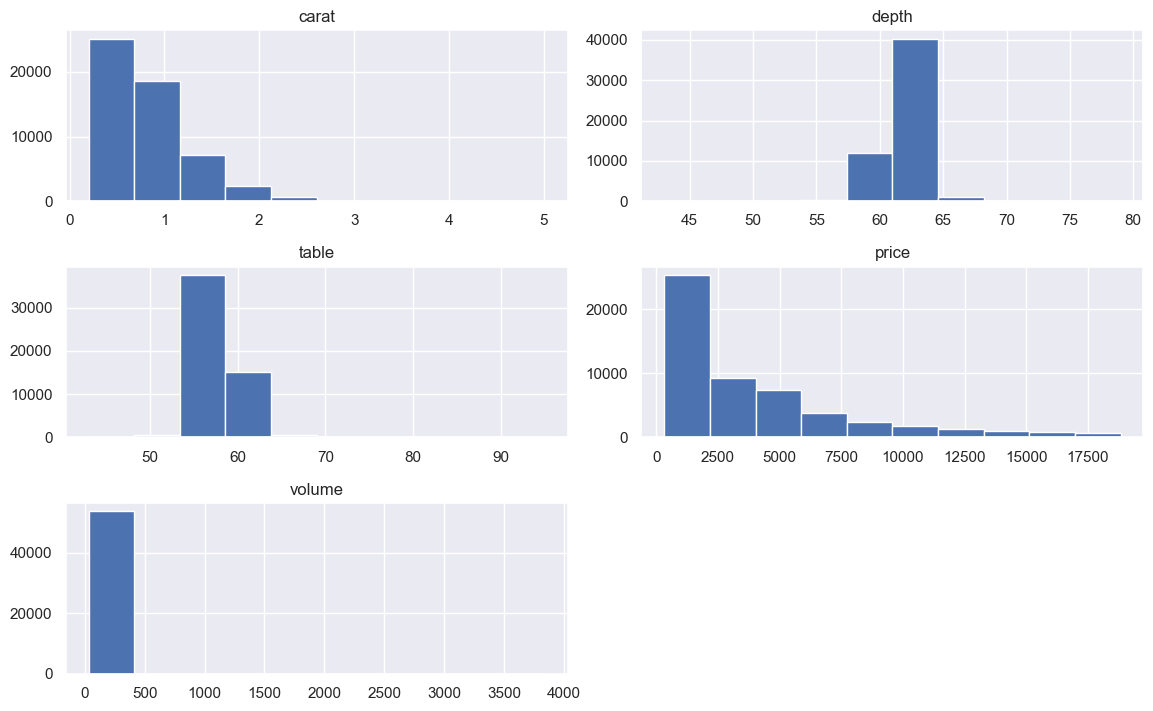

In [8]:
sns.set(rc={'figure.figsize':(11.7,7.27)})
df.hist()
plt.tight_layout()
plt.show()

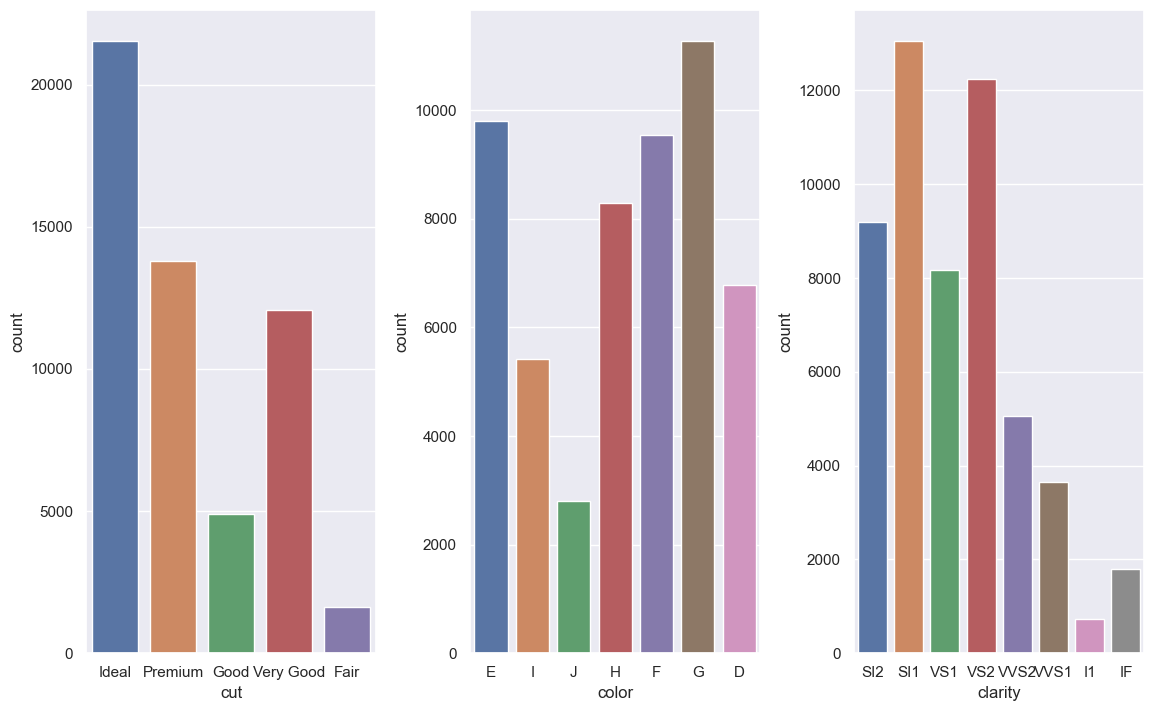

In [9]:
plt.subplot(1,3,1)
sns.countplot(data=df,x="cut")

plt.subplot(1,3,2)
sns.countplot(data=df,x="color")

plt.subplot(1,3,3)
sns.countplot(data=df,x="clarity")

plt.tight_layout()
plt.show()

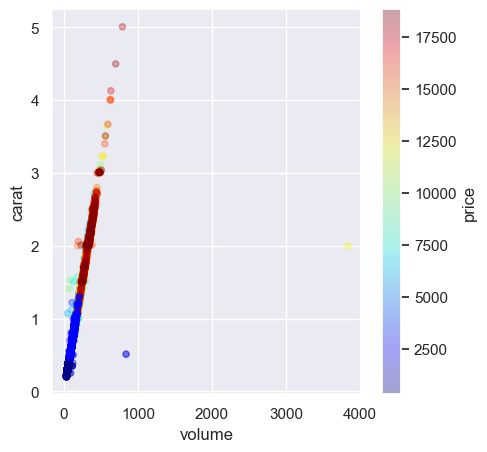

In [10]:
df.plot(kind="scatter", x="volume", y="carat", c="price",alpha=0.3,colorbar=True,cmap = plt.get_cmap('jet'),figsize=(5,5))
plt.show()

# Preparation

In [11]:
# encoding
# clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
# color : J (worst) to D (best)
# cut : (Fair, Good, Very Good, Premium, Ideal)

encoded_cut = OrdinalEncoder(categories=[["Fair","Good","Very Good","Premium","Ideal"]]).fit_transform(df[["cut"]])
encoded_color = OrdinalEncoder(categories=[["J","I","H","G","F","E","D"]]).fit_transform(df[["color"]])
encoded_clarity = OrdinalEncoder(categories=[["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]]).fit_transform(df[["clarity"]])

df["cut"] = encoded_cut
df["color"] = encoded_color
df["clarity"] = encoded_clarity

In [12]:
X = df.drop("price",axis=1)
y = df["price"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(43136, 7)
(10784, 7)


In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train[["carat","depth","table","volume"]])
X_train[["carat","depth","table","volume"]] = scaled
X_train.head(3)

,carat,cut,color,clarity,depth,table,volume
34120,-0.881034,4.0,5.0,3.0,0.171791,-0.651999,-0.885016
16745,0.848923,2.0,3.0,2.0,1.223492,-0.651999,0.839144
31354,-0.796646,4.0,4.0,2.0,-0.108663,-0.651999,-0.786957


In [15]:
scaled_test = scaler.transform(X_test[["carat","depth","table","volume"]])
X_test[["carat","depth","table","volume"]] = scaled_test

# Model Selection

### GridScearchCV

In [25]:
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)
rfr = RandomForestRegressor(random_state=0)
knn = KNeighborsRegressor(weights="distance",algorithm="brute")

alpha = [0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,5]

n_estimators = [15,25,50,75,100,125]
criterion = ["squared_error","absolute_error","friedman_mse"]

In [31]:
ridge_gs = GridSearchCV(ridge,{"alpha":alpha})
ridge_gs.fit(X_train,y_train)

pred1 = ridge_gs.predict(X_test)
ridge_r2 = r2_score(y_test,pred1)
ridge_rmse = np.sqrt(mean_squared_error(y_test,pred1))

print("ridge score : ",ridge_gs.score(X_train,y_train))
print("ridge r2_score : ",ridge_r2)
print("ridge rmse : ",ridge_rmse)
print("===========================================================")

lasso_gs = GridSearchCV(lasso,{"alpha":alpha})
lasso_gs.fit(X_train,y_train)

pred2 = lasso_gs.predict(X_test)
lasso_r2 = r2_score(y_test,pred2)
lasso_rmse = np.sqrt(mean_squared_error(y_test,pred2))

print("lasso score : ",lasso_gs.score(X_train,y_train))
print("lasso r2_score : ",lasso_r2)
print("lasso rmse : ",lasso_rmse)
print("===========================================================")

knn.fit(X_train,y_train)

pred3 = knn.predict(X_test)
knn_r2 = r2_score(y_test,pred3)
knn_rmse = np.sqrt(mean_squared_error(y_test,pred3))
print("knn score : ",knn.score(X_train,y_train))
print("knn r2_score : ",knn_r2)
print("knn rmse : ",knn_rmse)

ridge score :  0.9048499324162843
ridge r2_score :  0.8958137706012247
ridge rmse :  1298.9281526597547
lasso score :  0.904849931485998
lasso r2_score :  0.8958313307059618
lasso rmse :  1298.8186838954073
knn score :  0.999928528751314
knn r2_score :  0.9702944057690112
knn rmse :  693.5840407254206


In [32]:
# making the code re-usable for other data
models = [ridge_gs,lasso_gs,knn]
scores = [ridge_r2,lasso_r2,knn_r2]

final_model = models[0]
max_score = scores[0]

for i in range(len(scores)):
    if scores[i] > max_score :
        final_model = models[i]
        max_score = scores[i]
        
print("final model is : ", final_model)
print("the highest score : ", max_score)

final model is :  KNeighborsRegressor(algorithm='brute', weights='distance')
the highest score :  0.9702944057690112
